## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

In [116]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [117]:
products

[<li class="first">
 <p class="no1" id="no1">1</p>
 <div class="thumb">
 <a href="http://item.gmarket.co.kr/Item?goodscode=2563265875&amp;ver=637988487265260100" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2563265875'});"><img alt="너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔" class="lazy" data-original="//gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
 </div>
 <!--div class="goods-view">
 									<a href="http://minishop.gmarket.co.kr/apricot"><span class="view">판매자 다른상품 보기</span>APRICOT</a>
 								</div-->
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2563265875&amp;ver=637988487265260100" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2563265875'});">너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔</a>
 <div class="item_price">
 <div class="o-price"><span class="for-a11y">정가</span><span>29,600원</span></div>
 <div class="s-p

In [118]:
len(products)

100

In [119]:
products[0].select_one('a.itemname').get_text()

'너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔'

In [120]:
img_tag = products[0].select_one('img.lazy')
img_tag

<img alt="너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔" class="lazy" data-original="//gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [121]:
img_tag['data-original'] 


'//gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514'

In [122]:
img_tag['src']

'//image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [123]:
'https:'+ img_tag['data-original']


'https://gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514'

In [124]:
'https:'+ img_tag['src']


'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [125]:
img_url = 'https:'+ img_tag['data-original']
img_url

'https://gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514'

In [126]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/189842449/still/300?ver=2022090322'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [127]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수 

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products): 
    # print(index)

    #이미지 태그 
    img_tag = product.select_one('img.lazy')
    #이미지 URL링크 만들기 
    img_url = 'https:'+ img_tag['data-original']
    #print(img_url)

    #이미지 저장 
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img) 
    #5개만 저장하고 for문 빠져나오기 
    if index == crawl_num-1:
        break
print('크롤링 끝~~')        


크롤링 끝~~


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [128]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수 

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products): 
    # print(index)

    pname = product.select_one('a.itemname').get_text()
    pname = pname.replace('/','')
    print(pname)

    # #이미지 태그 
    img_tag = product.select_one('img.lazy')
    # #이미지 URL링크 만들기 
    img_url = 'https:'+ img_tag['data-original']
    # print(img_url)

    #이미지 저장 
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) +'_'+pname + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img) 

    #5개만 저장하고 for문 빠져나오기 
    if index == crawl_num-1:
        break
    
print('크롤링 끝~~')   


너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔
모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩
패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품
제이프랑 가을신상 티셔츠팬츠긴팔셋업
쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈
크롤링 끝~~


-----------------------------------------------------------------------
9/14
* for문 사용에 대해서 익숙해지자 
* 개발 과정에 대해 알아보는 시간을 가졌다. 

9/15
* for 문 사용에 대해서 자신감을 가지는 것이 목표 
* 여러가지 기능이 복합되어 있는 프로그램을 파이썬으로 만들어 본다. 

* 슬랙으로 완성한 이미지 파일을 제출하는 것으로 -> 슬랙: 코드 뽐내기 

* 오후: 데이터분석을 위한 판다스 라이브러리 사용법 
----------------------------------------------------------------------------


### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?

In [129]:
url=[]
for n in range(1,5):
    url.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
url

['http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04']

#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

In [177]:

from posixpath import dirname
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os

crawl_num = 5

url=[]
for n in range(1,5):
    url.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
    
    res = requests.get(url[n-1])
    soup = BeautifulSoup(res.content, 'html.parser')
    products = soup.select('div.best-list > ul > li') 

    for index,_ in enumerate(products):
        if index < crawl_num:
            img_tag = products[index].select_one('img.lazy')
            img_url = 'https:'+ img_tag['data-original']
            pname = products[index].select_one('a.itemname').get_text().replace('/',',')

            from urllib.request import urlopen
            with urlopen(img_url) as f:
                with open(f'./image/crawl/{n:02d}_{pname}_{index+1}' + '.jpg','wb') as h: # w - write b - binary
                    img = f.read()
                    h.write(img)
    # print("크롤링 끝",n)







### 파일 이름이 카테고리별로 정리 되려면 어떻게 해야할까요?
>예) <br>
>img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg <br>
>img1_[달바]화이트 트러플 미스트 세럼 180ml+180ml.jpg <br>
>크롤링한 파일이 섞여있어, 카테고리별 베스트 상품을 파악할 수 없어요. <br>

## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [178]:
!pip install Pillow

### 이미지 읽고 쓰기

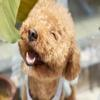

In [181]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
tmp 

In [182]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(100, 100)


In [183]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(100, 100)


### 이미지 사이즈 조절

In [184]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((100,100))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [185]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

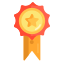

In [192]:
from PIL import Image

logo=Image.open('./image/top.png')
logo



In [187]:
print(logo.size)


(64, 64)


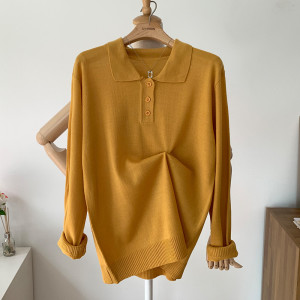

In [157]:
Image.open('.\image\crawl\category_num1_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg')

In [190]:
# area=(0,0,64,64)

p=Image.open('.\image\crawl\category_num1_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg')

area=(0,0,logo.width,logo.height)

p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법

p.save('.\image\crawl\category_num1_[logo]_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg')
p.close()
logo.close() 

ValueError: Operation on closed image

## 디렉토리안 파일리스트 가져오기

In [191]:
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList

['01_너의지금 20%쿠폰 신상니트 가디건,롱,세트,가을신상,크롭,박스,루즈핏,긴팔_1.jpg',
 '01_모노시크,가을신상 티셔츠,맨투맨,후드,니트,블라우스,셔츠,남방,가디건,세트,팬츠,스커트,데일리룩_2.jpg',
 '01_쇼인더룸 가을신상할인 티셔츠,세트,팬츠,빅사이즈_5.jpg',
 '01_제이프랑 가을신상 티셔츠,팬츠,긴팔,셋업_4.jpg',
 '01_패션라인 가을신상 원피스,니트,맨투맨,셔츠,팬츠,청바지,자켓,데님,세트상품_3.jpg',
 '02_[디즈니]슈라모드,디즈니 외 F,W 1+1,단품 거실화 털슬리퍼_4.jpg',
 '02_[에스콰이아]30% 에스콰이아 가을준비 F,W 가방 (숄더백,토트,미니백외)_1.jpg',
 '02_[투투삭스]균일가 착용감 좋은 양말,발목,중목,패션,학생_2.jpg',
 '02_가을 신상 은침귀걸이 우영우 고래귀걸이 원터치 링 스터드_5.jpg',
 '02_보가 가을신상 슬링백,블로퍼,펌프스,스니커즈_3.jpg',
 '03_[맥퀸뉴욕]UV쉴드 자외선차단 선패치 골프패치 선크림 외 아이라이너,아이브로우,멀티밤~75%_2.jpg',
 '03_[에뛰드]에뛰드 개강한세일 UPTO 55%_4.jpg',
 '03_[에바스]로에랑스 퍼퓸 바디미스트,샤워코롱 250ml(+행사중)_5.jpg',
 '03_[우르오스][우르오스] 스킨워시 500ml x 2개 (9,14  스킨로션 15ml + 스킨밀크 15ml 증정)_3.jpg',
 '03_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값_1.jpg',
 '04_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '04_[버블트리]주니어 여아 가을 인기 스쿨룩  상하세트 팬츠 맨투맨 원피스 레깅스_3.jpg',
 '04_[베베앙]베베앙 아기물티슈  시그니처 대용량 100매 캡형 10팩_2.jpg',
 '04_[슈퍼대디]아기물티슈  엑셀런트 82 아기물티슈 캡형 70매 20팩_4.jpg',
 '04_[알로앤루]12%중복쿠폰 알로 알퐁소 가을신상오픈_1.

## 카테고리별 1등 파일에만 1등 로고합성하기

In [ ]:

from gettext import find
from re import I
from PIL import Image

flist=[]
for fl in fileList:
    if 'img1' in fl:
        flist.append(f'./image/{fl}')
flist


for fl in flist:
    p=Image.open(fl)
    logo=Image.open('./image/top.png')
    area=(0,0,logo.width,logo.height)

    p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


    p.save(fl)
    p.close()
    logo.close()


